In [1]:
!ls

Makefile     a.png        carnegie.jpg data         metis.ipynb  src
README.md    a.txt        checker.pl   hosts        output


In [180]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import numpy as np
import os

In [227]:
class Image:
    def __init__(self, file, type="png", width=None, height=None, noise=0.1):
        if type == "png":
            self.original_img = mpimg.imread(file)
            self.img = Image.binarize(self.original_img)
            self.noisy_img = Image.bernoulli_noise(self.img, noise)
            self.flat_img = Image.flatten(self.img)
            self.height = len(self.original_img)
            self.width = len(self.original_img[0])
        else:
            assert(width != None)
            assert(height != None)
            self.height = height
            self.width = width
            self.img = np.zeros([height, width])
            with open(file) as f:
                lines = f.readlines()
            for line in lines:
                x, y, color = lines.split()
            self.img[x][y] = color

    
    def savetxt(self, txt_file):
        np.savetxt(txt_file, Image.flatten(self.noisy_img), delimiter=" ", fmt='%d')
    
    def savepng(self, png_file):
        path = png_file.split("/")
        png_file = path[-1]
        fig, ax = plt.subplots()
        ax.axis("off")
        plt.tight_layout(pad=0)
        plt.margins(0)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.imshow(self.img)
        path[-1] = "binary_"+png_file
        plt.savefig(os.path.join(*path), bbox_inches='tight', pad_inches = 0, dpi=2048)
    
        fig, ax = plt.subplots()
        ax.axis("off")
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.imshow(self.noisy_img)
        path[-1] = "noisy_"+png_file
        plt.savefig(os.path.join(*path), bbox_inches='tight', pad_inches = 0, dpi=2048)
        
    def show(self):
        # only work when img is not flattened
        plt.imshow(self.img, cmap="gray")
        
    def show_noisy(self):
        # only work when img is not flattened
        plt.imshow(self.noisy_img, cmap="gray")
        
    @staticmethod
    def flatten(img):
        flat_img = np.zeros([img.shape[0], img.shape[1]], dtype=int)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                flat_img[i][j] = img[i][j][0]
        return flat_img
        
    @staticmethod
    def binarize(img):
        new_img = np.zeros([img.shape[0], img.shape[1], 3])
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if sum(img[i][j][:3]) <= 2.0:
                    new_img[i][j] = np.array([0, 0, 0])
                else:
                    new_img[i][j] = np.array([1, 1, 1])
        return new_img
    
    @staticmethod
    def bernoulli_noise(img, p):
        new_img = np.zeros([img.shape[0], img.shape[1], 3])
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                r = np.random.random()
                if r < p:
                    new_img[i][j] = 1 - img[i][j][:3]
                else:
                    new_img[i][j] = img[i][j][:3]
        return new_img
        
    '''
    def add_bernouli_noise(self, p):
        self.noisy_img = self.original_img.copy()
        for i in range(self.height):
            for j in range(self.width):
                if sum(self.noisy_img[i][j][:3]) <= 1.5:
                    self.noisy_img[i][j] = np.array([0, 0, 0, 1])
                else:
                    self.noisy_img[i][j] = np.array([1, 1, 1, 1])
                r = np.random.random()
                if r < p:
                    self.noisy_img[i][j][:3] = 1 - self.noisy_img[i][j][:3]
    '''
                





In [228]:
def make_img(filename, noise=0.1):
    img = Image(f"data/{filename}.png", noise=noise)
    img.savepng(f"data/{filename}.png")
    img.savetxt(f"data/noisy_{filename}.txt")
    

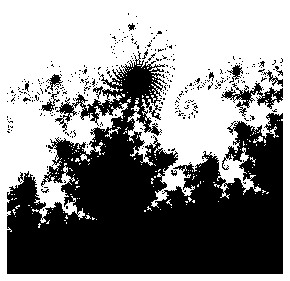

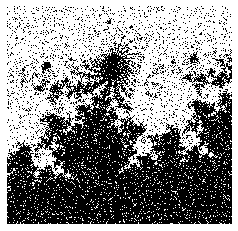

In [230]:
make_img("mandelbrot2")

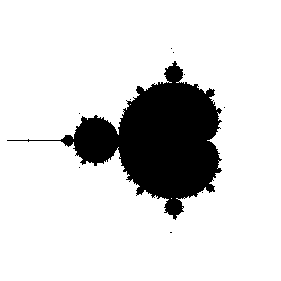

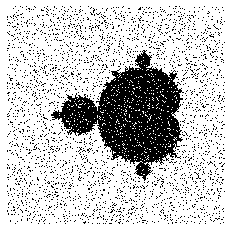

In [229]:
make_img("mandelbrot")

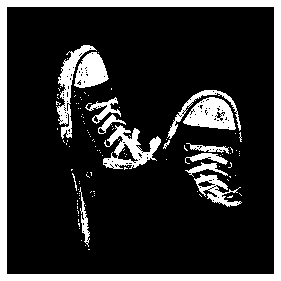

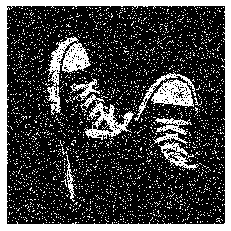

In [224]:
make_img("sneakers")

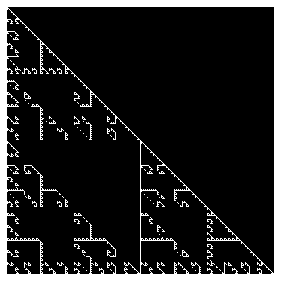

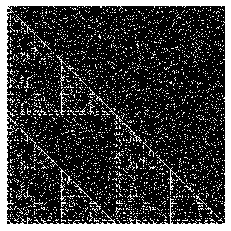

In [231]:
make_img("fractal_triangles")